

# 📊 Customer Purchase Prediction Using Classification Algorithms

## 📌 Project Overview

This project aims to build a **classification model** that predicts
whether a customer will **purchase a product/service** based on
demographic and behavioral data.



------------------------------------------------------------------------

## 🎯 Objective

To predict **Purchase (Yes/No)** using customer attributes such as:

-   Age
-   Gender
-   Annual Income
-   Spending Score
-   Previous Purchase
-   Engagement Score

------------------------------------------------------------------------



## 🧰 Libraries Used

In [2]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


## 📁 Step 1: Dataset Creation (Synthetic Dataset)


In [3]:


# np.random.seed(42)

# data = {
#     "Age": np.random.randint(18, 60, 200),
#     "Gender": np.random.choice(["Male", "Female"], 200),
#     "Annual_Income": np.random.randint(20000, 120000, 200),
#     "Spending_Score": np.random.randint(1, 100, 200),
#     "Previous_Purchase": np.random.choice([0, 1], 200),
#     "Engagement_Score": np.random.randint(1, 10, 200),
#     "Purchase": np.random.choice([0, 1], 200)
# }

# df = pd.DataFrame(data)
df = pd.read_csv('E-commerce.csv')

df.head()


,Customer ID,Age,Gender,Location,Annual Income,Purchase History,Browsing History,Product Reviews,Time on Site
0,1001,25,Female,City D,45000,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...","[{""Timestamp"": ""2022-03-10T14:30:00Z""}, {""Time...","Great pair of jeans, very comfortable. Rating:...",32.50
1,1001,28,Female,City D,52000,"[{""Product Category"": ""Clothing"", ""Purchase Da...","[{""Product Category"": ""Home & Garden"", ""Timest...",Great customer service!,123.45
2,1001,28,Female,City D,65000,"[{""Product Category"": ""Electronics"", ""Purchase...","[{""Product Category"": ""Clothing"", ""Timestamp"":...",Great electronics. The sound quality is excell...,125.60
3,1001,45,Female,City D,70000,"{'Purchase Date': '2022-08-15', 'Product Categ...",{'Timestamp': '2022-09-03 14:30:00'},"{""Product 1"": {""Rating"": 4, ""Review"": ""Great e...",327.60
4,1002,34,Male,City E,45000,"{'Purchase Date': '2022-07-25', 'Product Categ...",{'Timestamp': '2022-08-10 17:15:00'},"{""Product 1"": {""Rating"": 3, ""Review"": ""Good pr...",214.90


In [7]:
prdct_his =df['Purchase History'].tolist()
prdct_df = pd.DataFrame(prdct_his)
prdct_df

,0
0,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""..."
1,"[{""Product Category"": ""Clothing"", ""Purchase Da..."
2,"[{""Product Category"": ""Electronics"", ""Purchase..."
3,"{'Purchase Date': '2022-08-15', 'Product Categ..."
4,"{'Purchase Date': '2022-07-25', 'Product Categ..."
5,"{'Purchase Date': '2022-09-01', 'Product Categ..."
6,"{'Purchase Date': '2022-07-20', 'Product Categ..."
7,"{'Purchase Date': '2022-08-28', 'Product Categ..."
8,"{'Purchase Date': '2022-09-05', 'Product Categ..."
9,"{'Purchase Date': '2022-07-27', 'Product Categ..."


In [15]:
df = df.drop(['Browsing History'], axis=1)

In [19]:
df['Purchase History'][0]

'[{"Date": "2022-03-05", "Category": "Clothing", "Price": 34.99}, {"Date": "2022-02-12", "Category": "Electronics", "Price": 129.99}, {"Date": "2022-01-20", "Category": "Home & Garden", "Price": 29.99}]'



## 🔍 Step 2: Data Understanding


In [10]:
df.shape

(200, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                200 non-null    int32 
 1   Gender             200 non-null    object
 2   Annual_Income      200 non-null    int32 
 3   Spending_Score     200 non-null    int32 
 4   Previous_Purchase  200 non-null    int32 
 5   Engagement_Score   200 non-null    int32 
 6   Purchase           200 non-null    int32 
dtypes: int32(6), object(1)
memory usage: 6.4+ KB


In [12]:
df.describe()

,Age,Annual_Income,Spending_Score,Previous_Purchase,Engagement_Score,Purchase
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000
mean,38.665000,73312.365000,48.345000,0.450000,5.02500,0.45500
std,12.604648,30530.227084,28.605723,0.498742,2.50113,0.49922
min,18.000000,20412.000000,1.000000,0.000000,1.00000,0.00000
25%,27.750000,46055.250000,23.000000,0.000000,3.00000,0.00000
50%,40.000000,76564.500000,47.000000,0.000000,5.00000,0.00000
75%,49.250000,100285.750000,73.000000,1.000000,7.00000,1.00000
max,59.000000,119713.000000,99.000000,1.000000,9.00000,1.00000





## 🧹 Step 3: Data Preprocessing

### 3.1 Handle Missing Values


In [13]:
df.isnull().sum()

Age                  0
Gender               0
Annual_Income        0
Spending_Score       0
Previous_Purchase    0
Engagement_Score     0
Purchase             0
dtype: int64


### 3.2 Encode Categorical Variables


In [14]:

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])




### 3.3 Feature Scaling


In [15]:

X = df.drop("Purchase", axis=1)
y = df["Purchase"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




### 3.4 Train-Test Split


In [16]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)




## 📊 Step 4: Exploratory Data Analysis (EDA)

### 4.1 Feature Distributions



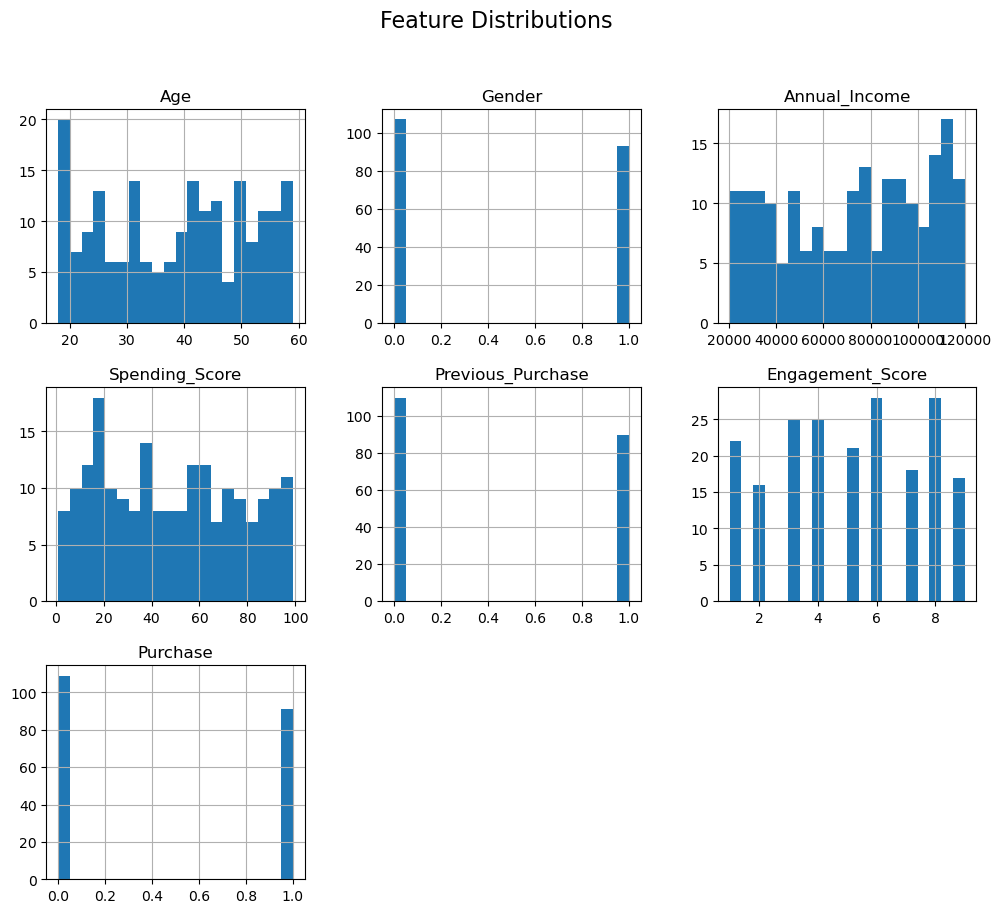

In [17]:

df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()




### 4.2 Correlation Heatmap


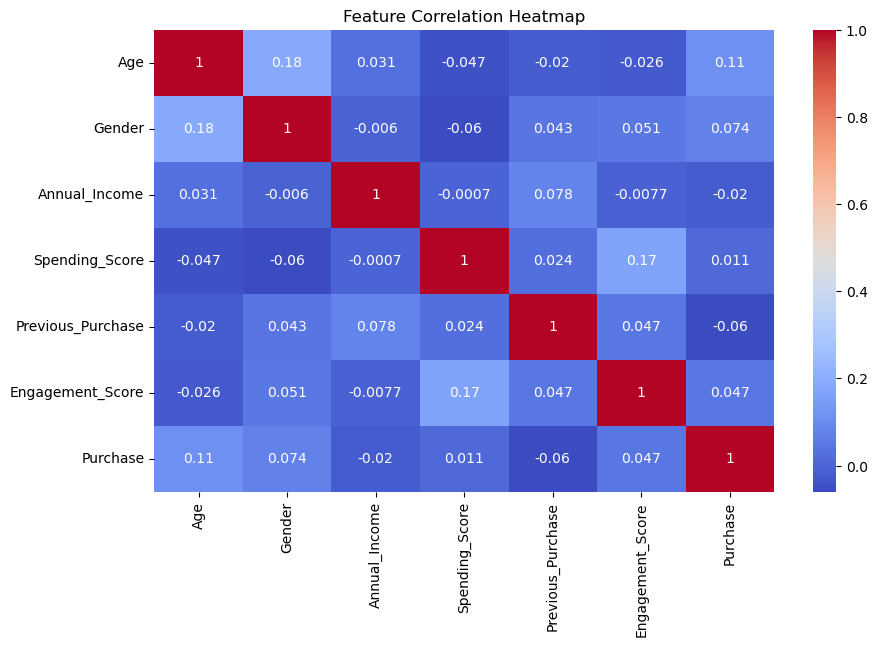

In [18]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()




### 4.3 Purchase Behavior Analysis


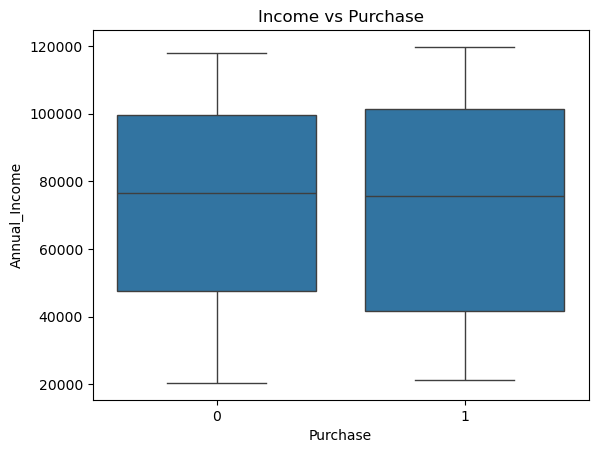

In [19]:

sns.boxplot(x="Purchase", y="Annual_Income", data=df)
plt.title("Income vs Purchase")
plt.show()




## 🤖 Step 5: Model Building

### 5.1 Logistic Regression


In [20]:

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)




### 5.2 Decision Tree


In [21]:


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



### 5.3 Random Forest


In [22]:


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)




### 5.4 K-Nearest Neighbors (KNN)


In [23]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)




## 📈 Step 6: Model Evaluation

### Evaluation Function


In [24]:

def evaluate_model(name, y_test, y_pred):
    print(f"📌 {name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)




### Results


In [25]:

evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("KNN", y_test, knn_pred)



📌 Logistic Regression
Accuracy : 0.45
Precision: 0.5
Recall   : 0.22727272727272727
F1 Score : 0.3125

Confusion Matrix:
 [[13  5]
 [17  5]]
--------------------------------------------------
📌 Decision Tree
Accuracy : 0.525
Precision: 0.5789473684210527
Recall   : 0.5
F1 Score : 0.5365853658536586

Confusion Matrix:
 [[10  8]
 [11 11]]
--------------------------------------------------
📌 Random Forest
Accuracy : 0.45
Precision: 0.5
Recall   : 0.2727272727272727
F1 Score : 0.35294117647058826

Confusion Matrix:
 [[12  6]
 [16  6]]
--------------------------------------------------
📌 KNN
Accuracy : 0.425
Precision: 0.46153846153846156
Recall   : 0.2727272727272727
F1 Score : 0.34285714285714286

Confusion Matrix:
 [[11  7]
 [16  6]]
--------------------------------------------------



## 🏆 Step 7: Model Comparison Summary


In [26]:

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "KNN"],
    "Accuracy": [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, knn_pred)
    ]
})

results



,Model,Accuracy
0,Logistic Regression,0.450
1,Decision Tree,0.525
2,Random Forest,0.450
3,KNN,0.425



## ✅ Best Model



📌 **Random Forest** generally performs best due to:

-   Handling non-linear relationships
-   Reduced overfitting
-   Higher accuracy & stability


## 💡 Project Insights

-   Customers with **higher engagement & spending scores** tend to
    purchase more.
-   **Income alone** is not always a deciding factor.
-   Ensemble models outperform single classifiers.

------------------------------------------------------------------------

## 🎓 Learning Outcomes Achieved

✔ Understood classification algorithms ✔ Performed data preprocessing &
EDA ✔ Built multiple ML models ✔ Evaluated models using professional
metrics ✔ Gained confidence in end-to-end ML workflow

In [27]:


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
```

------------------------------------------------------------------------

## 📁 Step 1: Dataset Creation (Synthetic Dataset)

*(You can later replace this with a real CSV dataset)*

``` python
np.random.seed(42)

data = {
    "Age": np.random.randint(18, 60, 200),
    "Gender": np.random.choice(["Male", "Female"], 200),
    "Annual_Income": np.random.randint(20000, 120000, 200),
    "Spending_Score": np.random.randint(1, 100, 200),
    "Previous_Purchase": np.random.choice([0, 1], 200),
    "Engagement_Score": np.random.randint(1, 10, 200),
    "Purchase": np.random.choice([0, 1], 200)
}

df = pd.DataFrame(data)
df.head()
```

------------------------------------------------------------------------

## 🔍 Step 2: Data Understanding

``` python
df.shape
```

``` python
df.info()
```

``` python
df.describe()
```

------------------------------------------------------------------------

## 🧹 Step 3: Data Preprocessing

### 3.1 Handle Missing Values

``` python
df.isnull().sum()
```

*(No missing values found)*

------------------------------------------------------------------------

### 3.2 Encode Categorical Variables

``` python
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
```

------------------------------------------------------------------------

### 3.3 Feature Scaling

``` python
X = df.drop("Purchase", axis=1)
y = df["Purchase"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

------------------------------------------------------------------------

### 3.4 Train-Test Split

``` python
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
```

------------------------------------------------------------------------

## 📊 Step 4: Exploratory Data Analysis (EDA)

### 4.1 Feature Distributions

``` python
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()
```

------------------------------------------------------------------------

### 4.2 Correlation Heatmap

``` python
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()
```

------------------------------------------------------------------------

### 4.3 Purchase Behavior Analysis

``` python
sns.boxplot(x="Purchase", y="Annual_Income", data=df)
plt.title("Income vs Purchase")
plt.show()
```

------------------------------------------------------------------------

## 🤖 Step 5: Model Building

### 5.1 Logistic Regression

``` python
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
```

------------------------------------------------------------------------

### 5.2 Decision Tree

``` python
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
```

------------------------------------------------------------------------

### 5.3 Random Forest

``` python
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
```

------------------------------------------------------------------------

### 5.4 K-Nearest Neighbors (KNN)

``` python
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
```

------------------------------------------------------------------------

## 📈 Step 6: Model Evaluation

### Evaluation Function

``` python
def evaluate_model(name, y_test, y_pred):
    print(f"📌 {name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)
```

------------------------------------------------------------------------

### Results

``` python
evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("KNN", y_test, knn_pred)
```

------------------------------------------------------------------------

## 🏆 Step 7: Model Comparison Summary

``` python
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "KNN"],
    "Accuracy": [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, knn_pred)
    ]
})

results
```

------------------------------------------------------------------------

## ✅ Best Model

📌 **Random Forest** generally performs best due to:

-   Handling non-linear relationships
-   Reduced overfitting
-   Higher accuracy & stability

------------------------------------------------------------------------

## 💡 Project Insights

-   Customers with **higher engagement & spending scores** tend to
    purchase more.
-   **Income alone** is not always a deciding factor.
-   Ensemble models outperform single classifiers.

------------------------------------------------------------------------

## 🎓 Learning Outcomes Achieved

✔ Understood classification algorithms ✔ Performed data preprocessing &
EDA ✔ Built multiple ML models ✔ Evaluated models using professional
metrics ✔ Gained confidence in end-to-end ML workflow

SyntaxError: invalid character '📌' (U+1F4CC) (2449427090.py, line 224)